In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [3]:
wine_r = pd.read_csv('winequality-red.csv',sep=';')

In [4]:
wine_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_r.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
#Data Visualization

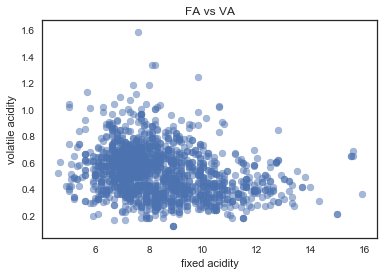

In [8]:
plt.scatter(x='fixed acidity',y='volatile acidity',data=wine_r,alpha=0.5)
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.title('FA vs VA')

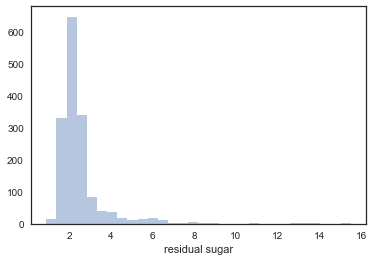

In [9]:
sns.distplot(wine_r['residual sugar'],kde=False,bins=30)

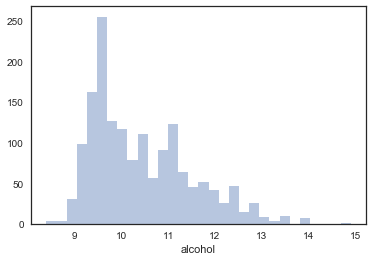

In [10]:
sns.distplot(wine_r['alcohol'],kde=False,bins=30)

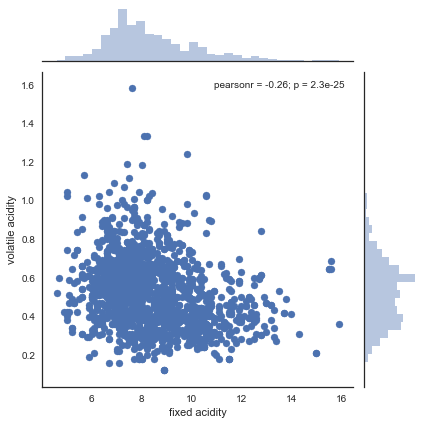

In [11]:
sns.jointplot(x='fixed acidity',y='volatile acidity',data=wine_r)

In [12]:
correlation_r = wine_r.corr()

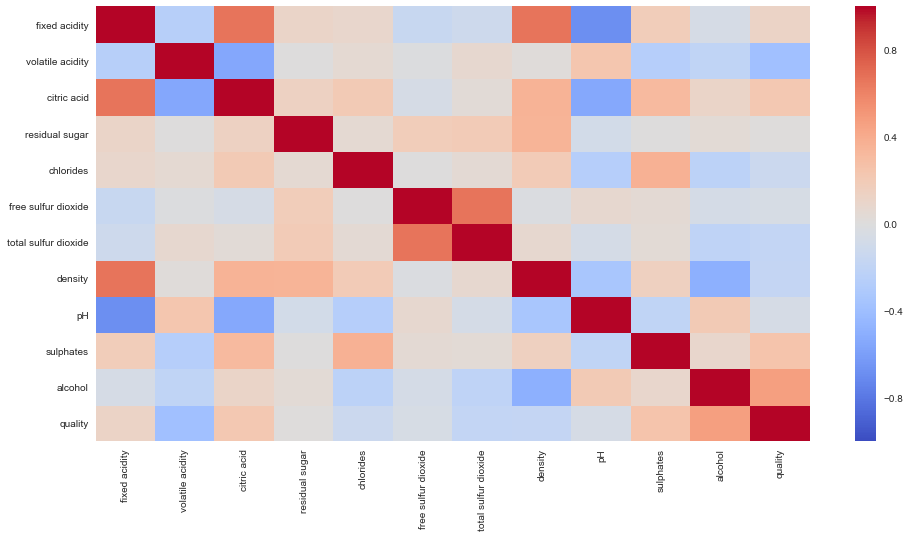

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(correlation_r,cmap='coolwarm')

In [14]:
plt.figure(figsize=(16,8))
sns.clustermap(winer,cmap='coolwarm')

NameError: name 'winer' is not defined

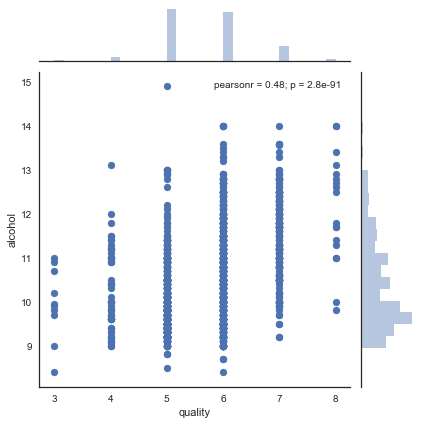

In [15]:
sns.jointplot(x='quality',y='alcohol',data=wine_r)

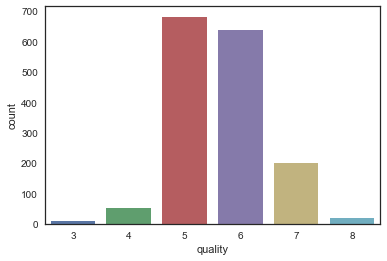

In [16]:
sns.countplot(x='quality',data=wine_r)

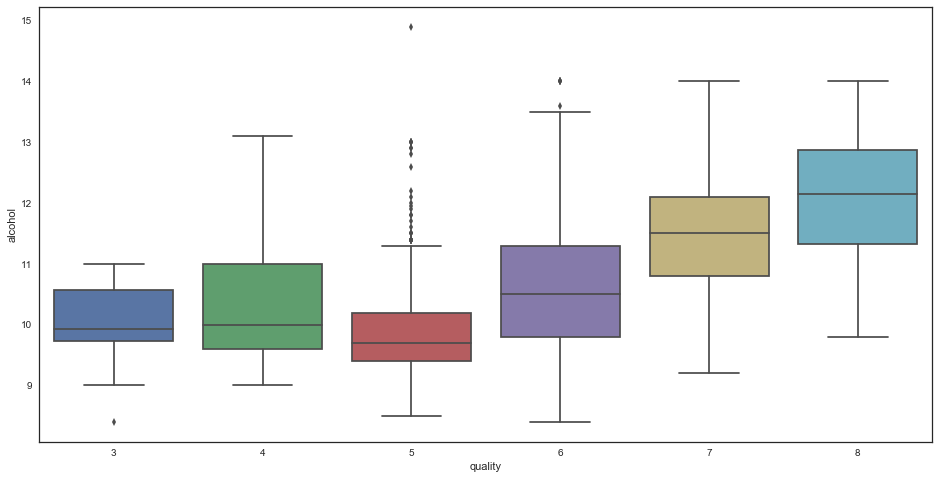

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(x='quality',y='alcohol',data=wine_r)

In [18]:
wine_r['pH'].mean()

3.311113195747343

In [19]:
#SVM(Support Vector Machine)

In [20]:
X = wine_r.drop('quality',axis=1)

In [21]:
y = wine_r['quality']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.svm import SVC

In [28]:
from sklearn.grid_search import GridSearchCV


C:\Users\AAKANCH JOSHI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AAKANCH JOSHI\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [29]:
param_grid = {'C':[0.1,1.0,10.0,100,1000],'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

In [30]:
grid_model = GridSearchCV(SVC(),param_grid,verbose=3)

In [31]:
grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.592000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=0.1, score=0.589812 -   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.568733 -   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.565333 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.533512 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.547170 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.434667 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.436997 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10.0, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [32]:
predictions = grid_model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0   0   2   0   0   0]
 [  0   0  12   4   0   0]
 [  2   0 152  38   0   0]
 [  0   0  76 119   4   0]
 [  0   0   2  46  13   0]
 [  0   0   0   6   4   0]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        16
          5       0.62      0.79      0.70       192
          6       0.56      0.60      0.58       199
          7       0.62      0.21      0.32        61
          8       0.00      0.00      0.00        10

avg / total       0.56      0.59      0.56       480



C:\Users\AAKANCH JOSHI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
#Random Forest

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [43]:
random_pred = rfc.predict(X_test)

In [44]:
print(confusion_matrix(y_test,random_pred))
print('\n')
print(classification_report(y_test,random_pred))

[[  0   0   3   2   0   0]
 [  0   0  13   9   0   0]
 [  0   0 156  38   1   0]
 [  0   1  35 138  13   0]
 [  0   0   4  28  32   0]
 [  0   0   0   4   3   0]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00        22
          5       0.74      0.80      0.77       195
          6       0.63      0.74      0.68       187
          7       0.65      0.50      0.57        64
          8       0.00      0.00      0.00         7

avg / total       0.63      0.68      0.65       480



C:\Users\AAKANCH JOSHI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
#KNN

In [46]:
scaler = StandardScaler()

In [48]:
scaler.fit(wine_r.drop('quality',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scal_data = scaler.transform(wine_r.drop('quality',axis=1))

In [50]:
X = wine_r.drop('quality',axis=1)
y = wine_r['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [54]:
pred = knn.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[  0   1   0   1   0   0]
 [  2   1   5  13   1   0]
 [  1   5 126  46  14   2]
 [  1   5  53 109  25   4]
 [  0   2  12  15  27   4]
 [  0   0   2   2   0   1]]


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.07      0.05      0.06        22
          5       0.64      0.65      0.64       194
          6       0.59      0.55      0.57       197
          7       0.40      0.45      0.43        60
          8       0.09      0.20      0.13         5

avg / total       0.55      0.55      0.55       480



In [57]:
error_rate = []

In [58]:
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

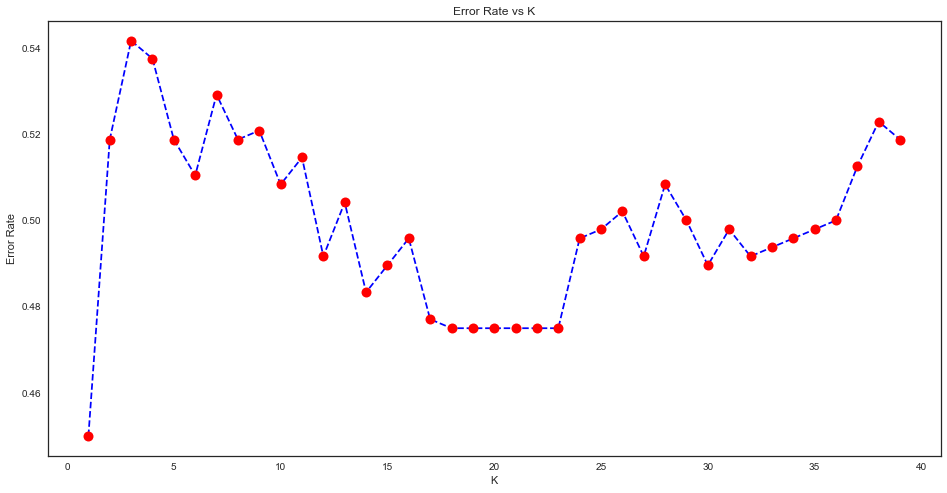

In [59]:
plt.figure(figsize=(16,8))
plt.plot(range(1,40),error_rate,color='blue',marker='o',markersize=10,markerfacecolor='red',linestyle='dashed')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
knn = KNeighborsClassifier(n_neighbors=14)

In [61]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [62]:
print(confusion_matrix(y_test,pred))

[[  0   0   1   1   0   0]
 [  0   0  12   8   2   0]
 [  0   0 133  59   2   0]
 [  0   0  87 104   6   0]
 [  0   0  15  34  11   0]
 [  0   0   2   2   1   0]]


In [63]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        22
          5       0.53      0.69      0.60       194
          6       0.50      0.53      0.51       197
          7       0.50      0.18      0.27        60
          8       0.00      0.00      0.00         5

avg / total       0.48      0.52      0.49       480



C:\Users\AAKANCH JOSHI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
